# Week 04: Exploratory Data Analysis

## COVID-19 Community Mobility Data


In this task, we will practice using exploratory data analysis on
Google’s COVID-19 Community Mobility data.

This data was collected from Google Maps users around the world over the
last few months - including you, *if* you have Google Maps on your phone
and have turned on the Location History setting. It combines location
history from a large number of users to capture the overall increase or
decrease in time spent in places such as: retail and recreation
facilities, groceries and pharmacies, parks, transit stations,
workplaces, and residences.

Learn about the data
--------------------

First, it is worthwhile to learn more about the data: how it is
collected, what is included, how Google gets consent to collect this
data, and how user privacy is protected. Google provides several
resources for learning about the data:

-   [Blog
    post](https://www.blog.google/technology/health/covid-19-community-mobility-reports?hl=en)
-   [About this
    data](https://www.google.com/covid19/mobility/data_documentation.html?hl=en#about-this-data)
-   [Understand the
    data](https://support.google.com/covid19-mobility/answer/9825414?hl=en&ref_topic=9822927)

Read in data
------------

Now you are ready to read the data into your notebook.

Visit Google’s web page for the [COVID-19 Community
Mobility](https://www.google.com/covid19/mobility/) project to get the
URL for the data.

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
# Import the URL

url = 'https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv'
df = pd.read_csv(url)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (4,5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### TODO 1

Use the `head()` function to look at the first few samples

In [9]:
# Run code here

df.head()

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,AE,United Arab Emirates,NaN,NaN,NaN,NaN,NaN,ChIJvRKrsd9IXj4RpwoIwFYv0zM,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0


### TODO 2

Use the `info()` function to look at the information

In [10]:
# Run code here

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6104431 entries, 0 to 6104430
Data columns (total 15 columns):
 #   Column                                              Dtype  
---  ------                                              -----  
 0   country_region_code                                 object 
 1   country_region                                      object 
 2   sub_region_1                                        object 
 3   sub_region_2                                        object 
 4   metro_area                                          object 
 5   iso_3166_2_code                                     object 
 6   census_fips_code                                    float64
 7   place_id                                            object 
 8   date                                                object 
 9   retail_and_recreation_percent_change_from_baseline  float64
 10  grocery_and_pharmacy_percent_change_from_baseline   float64
 11  parks_percent_change_from_baseline   

Basic data manipulations
------------------------

### TODO 3

The data includes a date field, but it may have been read in as a
string, rather than as a `datetime`. If that’s the case, use
`to_datetime()` to convert the field into a datetime format. (You can
follow the example in the “Exploratory data analysis” notebook from this
week’s lesson.)

Then, use `info()` again to make sure your change was applied. Note the
difference in the output, relative to the cell above.

In [11]:
# Run code here

df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6104431 entries, 0 to 6104430
Data columns (total 15 columns):
 #   Column                                              Dtype         
---  ------                                              -----         
 0   country_region_code                                 object        
 1   country_region                                      object        
 2   sub_region_1                                        object        
 3   sub_region_2                                        object        
 4   metro_area                                          object        
 5   iso_3166_2_code                                     object        
 6   census_fips_code                                    float64       
 7   place_id                                            object        
 8   date                                                datetime64[ns]
 9   retail_and_recreation_percent_change_from_baseline  float64       
 10  grocery_and_pharma

### TODO 4

Next, you are going to extract the subset of data for the location of
your choice.

The data is reported for different regions, with different levels of
granularity available. This is best explained by example:

Suppose I want the overall trend from the entire U.S. I would use the
subset of data where `country_region` is equal to “United States” and
`sub_region_1` is null:

    df_subset = df[(df['country_region'].eq("United States")) & (df['sub_region_1'].isnull())]

Suppose I want the overall trend from the entire state of New York: I
would use the subset of data where `country_region` is equal to “United
States”, `sub_region_1` is equal to “New York”, and `sub_region_2` is
null:

    df_subset = df[(df['country_region'].eq("United States")) & (df['sub_region_1'].eq("New York")) & (df['sub_region_2'].isnull())]

Suppose I want the overall trend from Brooklyn, New York (Kings County):
I would use the subset of data where `country_region` is equal to
“United States”, `sub_region_1` is equal to “New York”, and
`sub_region_2` is equal to “Kings County”:

    df_subset = df[(df['country_region'].eq("United States")) & (df['sub_region_1'].eq("New York")) & (df['sub_region_2'].eq("Kings County"))]

In the following cell(s), fill in the code to create a data frame
`df_subset` with data from a single location. You can go down to the
`sub_region_1` level or the `sub_region_2` level - depending on the
location you chose, the finer level of granularity may not be available.

In [12]:
# Run code here

df_subset = df[df['country_region'].eq('India')]
df_subset

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
2612732,IN,India,NaN,NaN,NaN,NaN,NaN,ChIJkbeSa_BfYzARphNChaFPjNc,2020-02-15,1.0,2.0,3.0,3.0,5.0,0.0
2612733,IN,India,NaN,NaN,NaN,NaN,NaN,ChIJkbeSa_BfYzARphNChaFPjNc,2020-02-16,2.0,2.0,3.0,2.0,0.0,0.0
2612734,IN,India,NaN,NaN,NaN,NaN,NaN,ChIJkbeSa_BfYzARphNChaFPjNc,2020-02-17,-1.0,1.0,3.0,1.0,4.0,0.0
2612735,IN,India,NaN,NaN,NaN,NaN,NaN,ChIJkbeSa_BfYzARphNChaFPjNc,2020-02-18,0.0,2.0,4.0,2.0,3.0,0.0
2612736,IN,India,NaN,NaN,NaN,NaN,NaN,ChIJkbeSa_BfYzARphNChaFPjNc,2020-02-19,0.0,2.0,1.0,1.0,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2954178,IN,India,West Bengal,West Medinipur,NaN,NaN,NaN,ChIJJXVMlY9CHToR4mlOVIq_xDQ,2021-07-07,-27.0,11.0,-2.0,-24.0,-11.0,17.0
2954179,IN,India,West Bengal,West Medinipur,NaN,NaN,NaN,ChIJJXVMlY9CHToR4mlOVIq_xDQ,2021-07-08,-16.0,17.0,5.0,-19.0,-1.0,17.0
2954180,IN,India,West Bengal,West Medinipur,NaN,NaN,NaN,ChIJJXVMlY9CHToR4mlOVIq_xDQ,2021-07-09,-19.0,11.0,7.0,-21.0,-7.0,19.0
2954181,IN,India,West Bengal,West Medinipur,NaN,NaN,NaN,ChIJJXVMlY9CHToR4mlOVIq_xDQ,2021-07-10,-22.0,6.0,6.0,-23.0,-6.0,19.0


In [13]:
df_subset = df[(df['country_region'].eq('India')) & (df['sub_region_1'].eq('Karnataka') & (df['sub_region_2']))]
df_subset

,country_region_code,country_region,sub_region_1,sub_region_2,metro_area,iso_3166_2_code,census_fips_code,place_id,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
2732192,IN,India,Karnataka,Bagalkot,NaN,NaN,NaN,ChIJrcgn8IaCxzsREsW7euo_pD0,2020-02-15,5.0,9.0,0.0,4.0,7.0,-1.0
2732193,IN,India,Karnataka,Bagalkot,NaN,NaN,NaN,ChIJrcgn8IaCxzsREsW7euo_pD0,2020-02-16,8.0,6.0,-2.0,7.0,1.0,-2.0
2732194,IN,India,Karnataka,Bagalkot,NaN,NaN,NaN,ChIJrcgn8IaCxzsREsW7euo_pD0,2020-02-17,2.0,3.0,-1.0,4.0,9.0,0.0
2732195,IN,India,Karnataka,Bagalkot,NaN,NaN,NaN,ChIJrcgn8IaCxzsREsW7euo_pD0,2020-02-18,4.0,-1.0,-2.0,2.0,7.0,0.0
2732196,IN,India,Karnataka,Bagalkot,NaN,NaN,NaN,ChIJrcgn8IaCxzsREsW7euo_pD0,2020-02-19,2.0,-4.0,-1.0,4.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2747577,IN,India,Karnataka,Yadgir,NaN,NaN,NaN,ChIJZXh1MZlDyDsRl9_JE1UoIuw,2021-07-07,11.0,44.0,52.0,-12.0,-17.0,7.0
2747578,IN,India,Karnataka,Yadgir,NaN,NaN,NaN,ChIJZXh1MZlDyDsRl9_JE1UoIuw,2021-07-08,10.0,42.0,53.0,-10.0,-10.0,10.0
2747579,IN,India,Karnataka,Yadgir,NaN,NaN,NaN,ChIJZXh1MZlDyDsRl9_JE1UoIuw,2021-07-09,1.0,46.0,52.0,-17.0,-14.0,12.0
2747580,IN,India,Karnataka,Yadgir,NaN,NaN,NaN,ChIJZXh1MZlDyDsRl9_JE1UoIuw,2021-07-10,-3.0,46.0,54.0,-15.0,-20.0,12.0


### TODO 5

Is the data complete, or is some data not available for the location you
have chosen? In the following cell, write code to check for missing data
in the `...percent_change_from_baseline` fields.

**HINT:** Use `info()`

In [14]:
# Run code here

df_subset[['retail_and_recreation_percent_change_from_baseline','grocery_and_pharmacy_percent_change_from_baseline','parks_percent_change_from_baseline','transit_stations_percent_change_from_baseline','workplaces_percent_change_from_baseline','residential_percent_change_from_baseline']].info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 15390 entries, 2732192 to 2747581
Data columns (total 6 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   retail_and_recreation_percent_change_from_baseline  15340 non-null  float64
 1   grocery_and_pharmacy_percent_change_from_baseline   14909 non-null  float64
 2   parks_percent_change_from_baseline                  15312 non-null  float64
 3   transit_stations_percent_change_from_baseline       15390 non-null  float64
 4   workplaces_percent_change_from_baseline             15390 non-null  float64
 5   residential_percent_change_from_baseline            15390 non-null  float64
dtypes: float64(6)
memory usage: 841.6 KB


### TODO 6

Edit the cell to answer the following question: Is the
data complete, or is some relevant data missing? Why would some
locations only have partial data available (missing some
`...percent_change_from_baseline` fields for some dates)? </br> 
**Include a short quote from the material you read in the “Learn about the data”
section to answer this question.**

**Answer:** </br>

The data depends on various factors-
1. User using the applicationa and settings enabled/disabled by the person
2. Connectivity at a particular day with the server of the application
3. Some data masked because of privacy issue in some part of the region in my dataset
4. Since the data set is huge(longer date-range), any updates in the application might have affected the data
5. The data isn't directly mapped with people or country. Because of privacy reasons, the data is put through various tools and can be corrupted.

These factors could have influenced some data to be NaN


### TODO 7

For this data, the `date` field is important, but we don’t necessarily
care about the absolute date. Instead, we care about how many days have
elapsed since the first confirmed case of COVID-19 in this location, how
many days have elapsed since a “stay at home” order or similar rule was
established in this location (if there was one) and how many days have
elapsed since it was lifted (if applicable).

For example, in New York, I might compute:

    days_since_lockdown = (df_subset['date'] - pd.to_datetime('2020-03-20 00:00:00')).dt.days.values
    # NYC lockdown March 20, 2020 https://www.nytimes.com/2020/03/20/us/coronavirus-today.html

In [15]:
# Run code here

days_since_lockdown = (df_subset['date'] - pd.to_datetime('2020-03-23 00:00:00')).dt.days.values
#Karnataka, India lockdown March 23, 2020 -> https://www.indiatoday.in/india/story/coronavirus-in-india-karnataka-announces-lockdown-from-march-24-till-march-31-1658875-2020-03-23
days_since_lockdown

array([-37, -36, -35, ..., 473, 474, 475])

## Visualize data

### TODO 8

Finally, we are going to visualize the changes in human mobility over
this time, for the location you have chosen.

In the following cell, create a figure with six subplots, arranged
vertically. On the horizontal axis, put the
`days_since...` array you computed in the previous cell. On the vertical
axes, show:

-   `retail_and_recreation_percent_change_from_baseline` in the top
    subplot
-   `grocery_and_pharmacy_percent_change_from_baseline` in the next
    subplot
-   `parks_percent_change_from_baseline` in the next subplot
-   `transit_stations_percent_change_from_baseline` in the next subplot
-   `workplaces_percent_change_from_baseline` in the next subplot
-   `residential_percent_change_from_baseline` in the bottom subplot

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:64: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self.fig.tight_layout(*args, **kwargs)


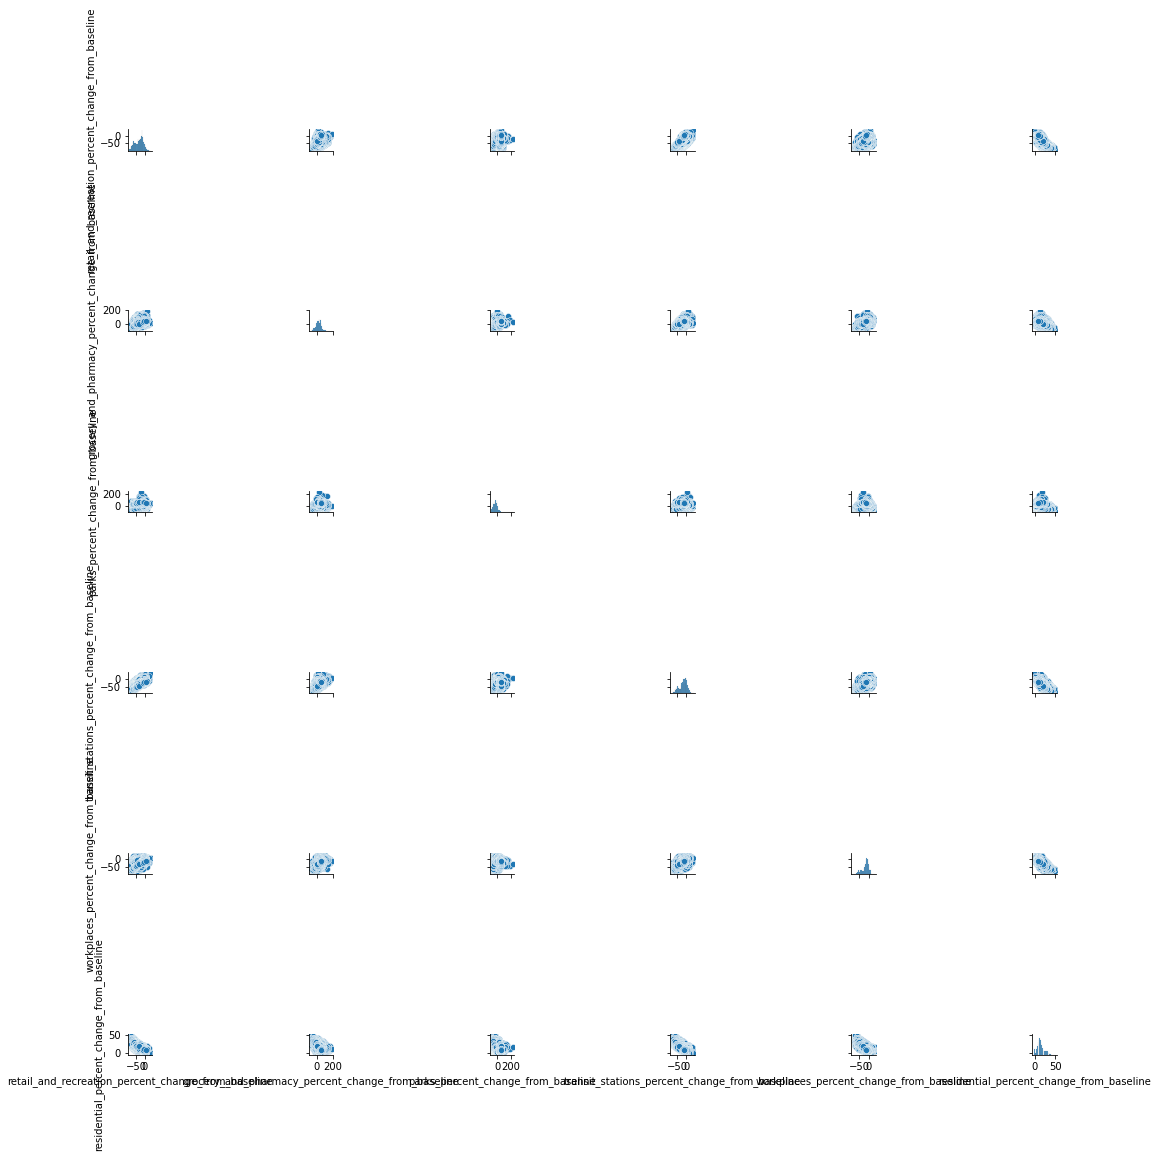

In [17]:
# Run code here

sns.pairplot(df_subset, vars=['retail_and_recreation_percent_change_from_baseline', 'grocery_and_pharmacy_percent_change_from_baseline','parks_percent_change_from_baseline','transit_stations_percent_change_from_baseline','workplaces_percent_change_from_baseline','residential_percent_change_from_baseline']) #couldn't plot the days_since_lockdown

### TODO 9

Answer the following question: Do the results seem to
satisfy “common sense”? Explain, citing specific data from your plot to
support your answer.

**Answer:** </br>



:(

## Vaccination Data (For Reference)

Now, let's look at some vaccinated data

In [ ]:
df_vax = pd.read_csv('https://github.com/owid/covid-19-data/raw/master/public/data/vaccinations/us_state_vaccinations.csv')

In [ ]:
df_vax.head()

In [ ]:
df_vax.shape

In [ ]:
df_vax['date'] = pd.to_datetime(df_vax['date'])

In [ ]:
df_vax_subset = df_vax[df_vax['location'].eq('New York State')]
df_vax_subset.info()

In [ ]:
url_cases = 'https://github.com/nytimes/covid-19-data/raw/master/us-states.csv'
df_cases = pd.read_csv(url_cases)

In [ ]:
df_cases.head()

In [ ]:
df_cases.shape

In [ ]:
df_cases['date'] = pd.to_datetime(df_cases['date'])
df_cases_subset = df_cases[df_cases['state'].eq('New York')]
df_cases_subset.head()

In [ ]:
_ = sns.lineplot(x=df_cases_subset['date'], y=df_cases_subset['cases'])